In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

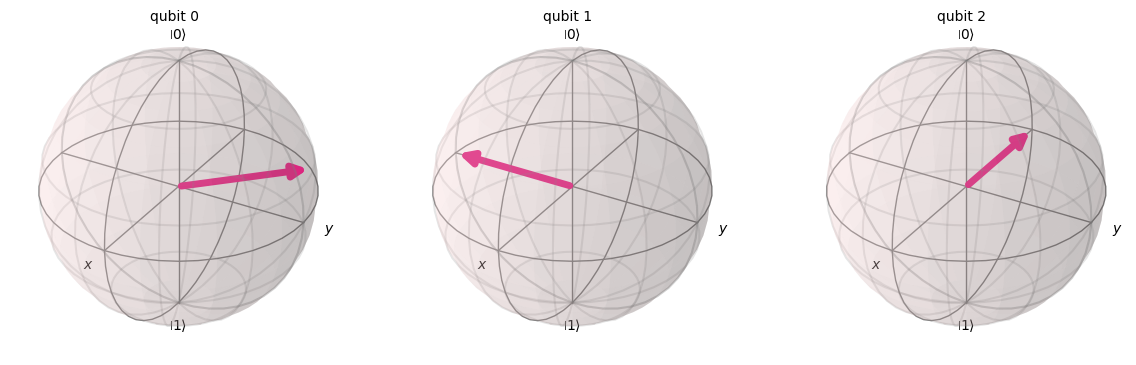

In [ ]:
from math import pi

def process_qbit(qc: QuantumCircuit, qbit: int):
    
    qc.h(qbit)

    for i in range(qbit - 1, -1, -1):
        qc.cp(np.pi / (2 ** (qbit - i)), qbit, i)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):

    for i in range(circuit.num_qubits - 1, -1, -1):
        process_qbit(circuit, i)
    swap_registers(circuit, n)
    return circuit

# Create the circuit
qc = QuantumCircuit(3)

# Encode the state 5
qc.x(0)
qc.x(1)
qc.draw()

sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

qft(qc,3)
qc.draw('mpl')

qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

QFT

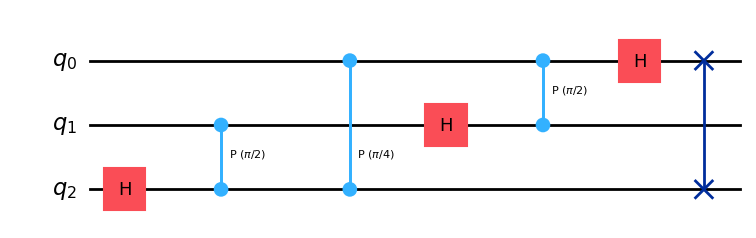

In [4]:
def process_qbit(qc: QuantumCircuit, qbit: int):
    
    qc.h(qbit)

    for i in range(qbit - 1, -1, -1):
        qc.cp(np.pi / (2 ** (qbit - i)), qbit, i)
    
    return qc


def qft(qc: QuantumCircuit):

    for i in range(qc.num_qubits - 1, -1, -1):
        process_qbit(qc, i)

    for i in range(qc.num_qubits // 2):
        qc.swap(i, qc.num_qubits - i - 1)
    
    return qc

example_qft = QuantumCircuit(3)
qft(example_qft)
example_qft.draw('mpl')


IQFT

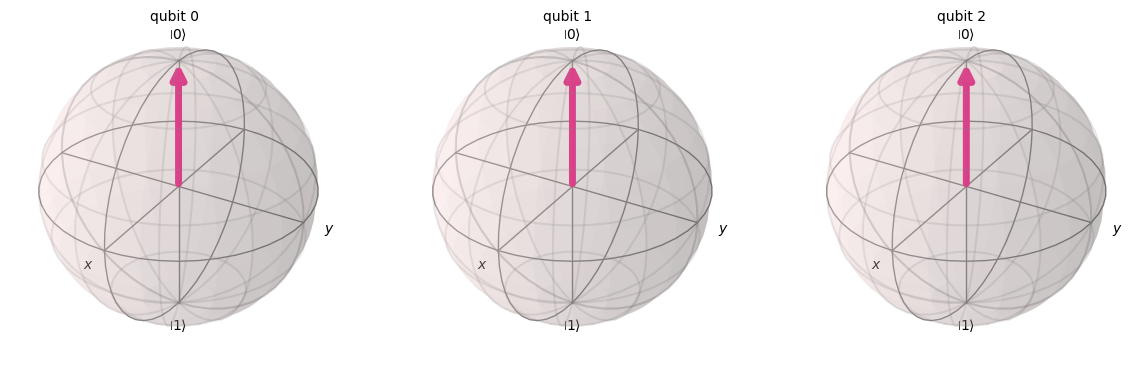

In [ ]:
# Create the circuit
qc = QuantumCircuit(3)

sim = Aer.get_backend("aer_simulator")

qft(qc,3)
qc.draw('mpl')

inv = qc.inverse()
qc.compose(inv, inplace=True)
qc.draw('mpl')

qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)
